In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import datetime as dt
import matplotlib.pyplot as plt

# get_summary

Fa una come GridSearchCV ma ritorna tutti i risultati in un dataframe.

In [2]:
def get_summary(X, y):
    activations = ['relu', 'logistic', 'tanh']
    hidden_layers = [(2), (3,3), (5), (6,3), (5,5),(6), (8), (10), (2,2,2)]

    summary = {"Activation" : [], "Hidden layer sizes" : [], "Scores" : [], "Mean score" : [], "Scores std" : []}

    for activation in activations:
        for hidden_layer in hidden_layers:
            mlp = MLPClassifier(activation=activation, hidden_layer_sizes=hidden_layer, learning_rate_init=0.001, max_iter=5000, learning_rate="adaptive")

            scores = cross_val_score(mlp, X, y)

            summary["Scores"].append(list(map(lambda x : round(x, 3), scores)))
            summary["Mean score"].append(round(scores.mean(), 3))
            summary["Scores std"].append(round(scores.std(), 3))
            summary["Activation"].append(activation)
            summary["Hidden layer sizes"].append(hidden_layer)

    summ = pd.DataFrame(summary)
    return summ.sort_values('Mean score', ascending=False)

In [3]:
df = pd.read_excel('data/IncidentiModificato.xlsx')
df.DATA = df.DATA.apply(lambda d: (d - dt.datetime(1970,1,1)).days)

X = df[['SESSO', 'ANNI', 'PESO', 'ALTEZZA', 'BMI', 'Tot Testa', 'Tot Torace', 'Tot Addome', 'Tot Scheletro']]
y = df['Mezzo']

sc = StandardScaler()
X_std = sc.fit_transform(X)

get_summary(X_std, y)

,Activation,Hidden layer sizes,Scores,Mean score,Scores std
14,logistic,6,"[0.654, 0.731, 0.808, 0.808, 0.5]",0.700,0.115
19,tanh,"(3, 3)","[0.654, 0.731, 0.692, 0.808, 0.538]",0.685,0.089
15,logistic,8,"[0.654, 0.769, 0.769, 0.654, 0.577]",0.685,0.075
26,tanh,"(2, 2, 2)","[0.577, 0.769, 0.769, 0.692, 0.577]",0.677,0.086
11,logistic,5,"[0.654, 0.731, 0.769, 0.615, 0.577]",0.669,0.071
18,tanh,2,"[0.577, 0.846, 0.731, 0.654, 0.5]",0.662,0.120
1,relu,"(3, 3)","[0.654, 0.692, 0.654, 0.731, 0.577]",0.662,0.051
2,relu,5,"[0.577, 0.731, 0.654, 0.654, 0.654]",0.654,0.049
24,tanh,8,"[0.615, 0.731, 0.654, 0.615, 0.615]",0.646,0.045
0,relu,2,"[0.577, 0.692, 0.654, 0.731, 0.577]",0.646,0.062


# PCA sulle parti del corpo invece che una somma

Sembra andare leggermente meglio

In [4]:
from sklearn.decomposition import PCA
pd.options.mode.chained_assignment = None  # default='warn'

X_pca = df[['SESSO', 'ANNI', 'PESO', 'ALTEZZA','BMI']]

for parte_corpo in ['Testa', 'Torace', 'Addome', 'Scheletro']:
    pca = PCA(n_components=1).fit_transform(df.filter(regex=parte_corpo+":"))
    X_pca['PCA ' + parte_corpo] = pca
    
X_pca_std = StandardScaler().fit_transform(X_pca)

get_summary(X_pca_std, y)

,Activation,Hidden layer sizes,Scores,Mean score,Scores std
1,relu,"(3, 3)","[0.654, 0.769, 0.808, 0.846, 0.577]",0.731,0.100
15,logistic,8,"[0.615, 0.692, 0.846, 0.808, 0.577]",0.708,0.105
11,logistic,5,"[0.577, 0.769, 0.846, 0.769, 0.577]",0.708,0.110
9,logistic,2,"[0.615, 0.731, 0.731, 0.846, 0.577]",0.700,0.095
14,logistic,6,"[0.538, 0.769, 0.846, 0.769, 0.577]",0.700,0.120
16,logistic,10,"[0.577, 0.692, 0.808, 0.769, 0.577]",0.685,0.095
20,tanh,5,"[0.577, 0.654, 0.692, 0.654, 0.692]",0.654,0.042
18,tanh,2,"[0.538, 0.731, 0.654, 0.731, 0.615]",0.654,0.073
3,relu,"(6, 3)","[0.577, 0.692, 0.654, 0.692, 0.577]",0.638,0.052
24,tanh,8,"[0.5, 0.692, 0.577, 0.731, 0.654]",0.631,0.083


## Accuracy del miglior stimatore con una cross validation annidata

Questa procedura ci conferma che avere come funzione di attivazione la logistic e un solo strato nascosto con 6 neuroni sia una buona idea.

In [5]:
from sklearn.model_selection import GridSearchCV

params = {
    'activation': ['relu', 'logistic', 'tanh'],
    'hidden_layer_sizes' : [(2), (3,3), (5), (6,3), (5,5),(6), (8), (10)]
}

mlp = MLPClassifier(learning_rate_init=0.001, max_iter=5000, learning_rate="adaptive")

clf = GridSearchCV(mlp, params, n_jobs=-1, cv=5)

scores = cross_val_score(clf, X_pca_std, y, cv=5)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.68 (+/- 0.20)


In [6]:
clf.fit(X_pca_std, y)
clf.best_estimator_

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=8, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# Riduco tutti i dati con TSNE a due dimensioni

Dopo un po' di test ho scoperto che questa procedura migliori leggermente le prestazioni.

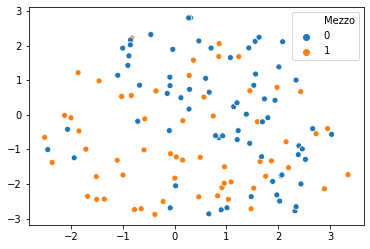

In [7]:
from sklearn.manifold import TSNE
import seaborn as sns

X_tsne = TSNE(perplexity=70, method='exact', n_components=2).fit_transform(X_pca_std)
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=y)
plt.show()

In [8]:
get_summary(X_tsne,y)

,Activation,Hidden layer sizes,Scores,Mean score,Scores std
24,tanh,8,"[0.615, 0.769, 0.731, 0.885, 0.577]",0.715,0.110
25,tanh,10,"[0.692, 0.769, 0.731, 0.808, 0.538]",0.708,0.093
21,tanh,"(6, 3)","[0.654, 0.731, 0.731, 0.846, 0.577]",0.708,0.090
22,tanh,"(5, 5)","[0.654, 0.731, 0.692, 0.808, 0.615]",0.700,0.066
16,logistic,10,"[0.692, 0.731, 0.731, 0.808, 0.5]",0.692,0.103
2,relu,5,"[0.654, 0.769, 0.731, 0.808, 0.5]",0.692,0.109
7,relu,10,"[0.654, 0.615, 0.731, 0.885, 0.577]",0.692,0.109
23,tanh,6,"[0.615, 0.731, 0.731, 0.885, 0.5]",0.692,0.129
6,relu,8,"[0.692, 0.692, 0.731, 0.808, 0.5]",0.685,0.101
4,relu,"(5, 5)","[0.654, 0.731, 0.692, 0.808, 0.5]",0.677,0.102


# Cross validation annidata anche ai dati con TSNE

Ci conferma che fa leggermente meglio, logicamente avendo cambiato le dimensionalità dei dati gli iperparametri del miglior classificatore non sono più simili a quelli trovati prima.

In [9]:
from sklearn.model_selection import GridSearchCV

params = {
    'activation': ['relu', 'logistic', 'tanh'],
    'hidden_layer_sizes' : [(2), (3,3), (5), (6,3), (5,5),(6), (8), (10)]
}

mlp = MLPClassifier(learning_rate_init=0.001, max_iter=5000, learning_rate="adaptive")

clf = GridSearchCV(mlp, params, n_jobs=-1, cv=5)

scores = cross_val_score(clf, X_tsne, y, cv=5)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.67 (+/- 0.17)


In [10]:
clf.fit(X_tsne, y)
clf.best_score_

0.7076923076923077

In [11]:
clf.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6, 3), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# Over sampling con SMOTE

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [23]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(sampling_strategy={0 : 500, 1 : 500})
X_os, y_os = smote.fit_resample(X, y) 

X_os_std = StandardScaler().fit_transform(X_os)

E:\anaconda3\lib\site-packages\imblearn\utils\_validation.py:324: UserWarning: After over-sampling, the number of samples (500) in class 0 will be larger than the number of samples in the majority class (class #0 -> 70)
  n_samples_majority,
E:\anaconda3\lib\site-packages\imblearn\utils\_validation.py:324: UserWarning: After over-sampling, the number of samples (500) in class 1 will be larger than the number of samples in the majority class (class #0 -> 70)
  n_samples_majority,


Controllo che non abbia semplicemente duplicato alcuni dati, mi era successo provando con `RandomOverSampler` sempre di `imblearn.over_sampling`: 

In [13]:
len(X_os.drop_duplicates())

1000

In [14]:
Counter(y)

Counter({0: 70, 1: 60})

In [15]:
Counter(y_os)

Counter({0: 500, 1: 500})

In [16]:
X_os.head()

,SESSO,ANNI,PESO,ALTEZZA,BMI,Tot Testa,Tot Torace,Tot Addome,Tot Scheletro
0,0,81,84.0,1.75,27.428571,2,0,3,9
1,1,69,69.0,1.62,26.291724,20,7,1,4
2,1,71,67.0,1.55,27.887617,6,0,0,4
3,1,54,60.0,1.59,23.733238,5,3,2,4
4,1,78,69.0,1.67,24.740937,2,0,2,4


# Testo la rete che sembrava la più promettente con i dati aumentati

Sembra esserci effettivamente un incremento di accuracy

In [17]:
my_mlp = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=6, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

scores = cross_val_score(my_mlp, X_os_std, y_os, cv=5)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.78 (+/- 0.09)


L'aumento dei dati sembra aver rispettato bene la distribuzione dei dati, ancora devo approfondire questa parte. Per ora mi sono limitato a guardare questi grafici e compararli con quelli del dataset senza oversampling.

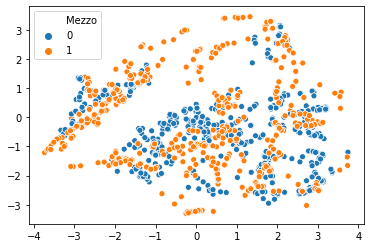

In [18]:
X_tsne = TSNE(perplexity=500).fit_transform(X_os_std)
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=y_os)
plt.show()

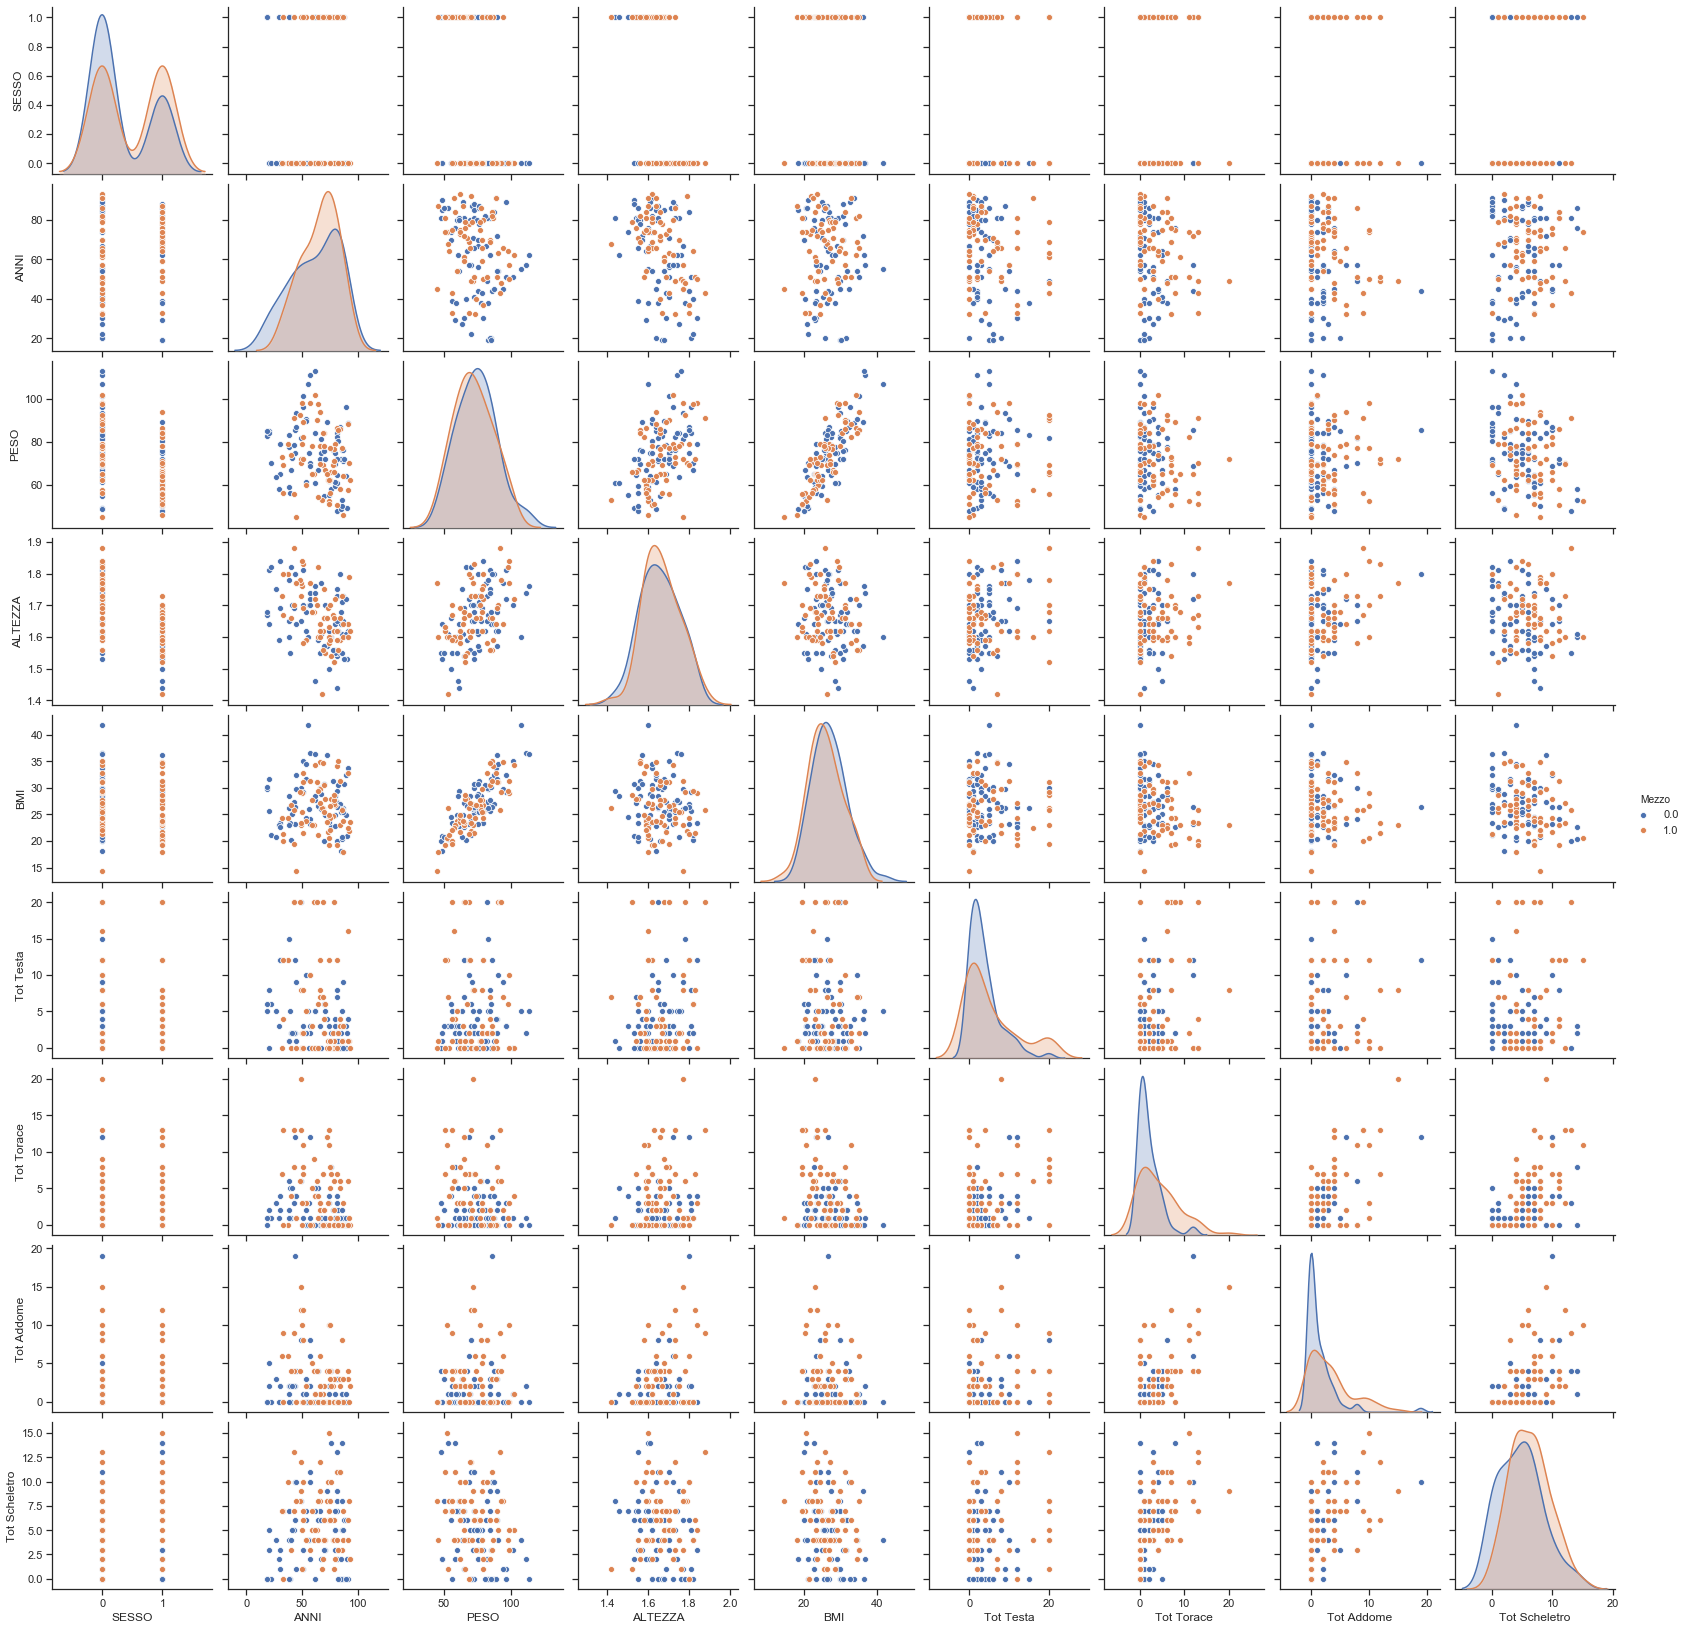

In [19]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
df_os = X_os
df_os['Mezzo'] = y
sns.pairplot(df_os, hue='Mezzo', diag_kind="kde",x_vars=df_os.columns[:-1], y_vars=df_os.columns[:-1])
plt.show()

Per curiosità ho guardato come se la cavano altre reti, quella che sembrava la più promettente prima ora è scesa un po' in classifica.

In [24]:
X_os, y_os = smote.fit_resample(X, y) 
X_os_std = StandardScaler().fit_transform(X_os)

get_summary(X_os, y_os) #dati non standardizzati

E:\anaconda3\lib\site-packages\imblearn\utils\_validation.py:324: UserWarning: After over-sampling, the number of samples (500) in class 0 will be larger than the number of samples in the majority class (class #0 -> 70)
  n_samples_majority,
E:\anaconda3\lib\site-packages\imblearn\utils\_validation.py:324: UserWarning: After over-sampling, the number of samples (500) in class 1 will be larger than the number of samples in the majority class (class #0 -> 70)
  n_samples_majority,


,Activation,Hidden layer sizes,Scores,Mean score,Scores std
15,logistic,8,"[0.785, 0.86, 0.86, 0.92, 0.825]",0.850,0.045
16,logistic,10,"[0.8, 0.87, 0.815, 0.815, 0.825]",0.825,0.024
24,tanh,8,"[0.8, 0.815, 0.81, 0.805, 0.845]",0.815,0.016
14,logistic,6,"[0.74, 0.895, 0.805, 0.77, 0.805]",0.803,0.052
23,tanh,6,"[0.775, 0.84, 0.815, 0.79, 0.795]",0.803,0.022
4,relu,"(5, 5)","[0.705, 0.775, 0.785, 0.72, 0.795]",0.756,0.036
25,tanh,10,"[0.835, 0.82, 0.8, 0.485, 0.835]",0.755,0.136
12,logistic,"(6, 3)","[0.79, 0.5, 0.84, 0.78, 0.85]",0.752,0.129
13,logistic,"(5, 5)","[0.82, 0.79, 0.825, 0.5, 0.815]",0.750,0.126
5,relu,6,"[0.705, 0.75, 0.745, 0.74, 0.785]",0.745,0.025


In [25]:
get_summary(X_os_std, y_os) #dati non standardizzati

,Activation,Hidden layer sizes,Scores,Mean score,Scores std
24,tanh,8,"[0.88, 0.905, 0.885, 0.925, 0.905]",0.900,0.016
25,tanh,10,"[0.885, 0.9, 0.925, 0.86, 0.88]",0.890,0.022
21,tanh,"(6, 3)","[0.845, 0.87, 0.925, 0.84, 0.885]",0.873,0.031
7,relu,10,"[0.84, 0.885, 0.9, 0.84, 0.875]",0.868,0.024
16,logistic,10,"[0.835, 0.885, 0.91, 0.82, 0.865]",0.863,0.033
22,tanh,"(5, 5)","[0.81, 0.83, 0.875, 0.81, 0.94]",0.853,0.050
6,relu,8,"[0.845, 0.85, 0.87, 0.765, 0.85]",0.836,0.037
3,relu,"(6, 3)","[0.835, 0.855, 0.85, 0.78, 0.845]",0.833,0.027
20,tanh,5,"[0.76, 0.85, 0.89, 0.84, 0.825]",0.833,0.042
23,tanh,6,"[0.805, 0.865, 0.86, 0.8, 0.83]",0.832,0.027


# Test con diverse numerosità di dati

In [26]:
for n_data in range(200,15000, 200):
    smote = SMOTE(sampling_strategy={0 : int(n_data/2), 1 : int(n_data/2)})
    X_os, y_os = smote.fit_resample(X, y) 

    X_os_std = StandardScaler().fit_transform(X_os)

    my_mlp = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
                  beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
                  hidden_layer_sizes=6, learning_rate='adaptive',
                  learning_rate_init=0.001, max_fun=15000, max_iter=5000,
                  momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
                  power_t=0.5, random_state=None, shuffle=True, solver='adam',
                  tol=0.0001, validation_fraction=0.1, verbose=False,
                  warm_start=False)

    scores = cross_val_score(my_mlp, X_os_std, y_os, cv=5)
    print("\nAccuracy with n_data = %d: %0.2f (+/- %0.2f)" % (n_data, scores.mean(), scores.std() * 2))

E:\anaconda3\lib\site-packages\imblearn\utils\_validation.py:324: UserWarning: After over-sampling, the number of samples (100) in class 0 will be larger than the number of samples in the majority class (class #0 -> 70)
  n_samples_majority,
E:\anaconda3\lib\site-packages\imblearn\utils\_validation.py:324: UserWarning: After over-sampling, the number of samples (100) in class 1 will be larger than the number of samples in the majority class (class #0 -> 70)
  n_samples_majority,



Accuracy with n_data = 200: 0.68 (+/- 0.12)


E:\anaconda3\lib\site-packages\imblearn\utils\_validation.py:324: UserWarning: After over-sampling, the number of samples (250) in class 0 will be larger than the number of samples in the majority class (class #0 -> 70)
  n_samples_majority,
E:\anaconda3\lib\site-packages\imblearn\utils\_validation.py:324: UserWarning: After over-sampling, the number of samples (250) in class 1 will be larger than the number of samples in the majority class (class #0 -> 70)
  n_samples_majority,



Accuracy with n_data = 500: 0.75 (+/- 0.06)


E:\anaconda3\lib\site-packages\imblearn\utils\_validation.py:324: UserWarning: After over-sampling, the number of samples (500) in class 0 will be larger than the number of samples in the majority class (class #0 -> 70)
  n_samples_majority,
E:\anaconda3\lib\site-packages\imblearn\utils\_validation.py:324: UserWarning: After over-sampling, the number of samples (500) in class 1 will be larger than the number of samples in the majority class (class #0 -> 70)
  n_samples_majority,



Accuracy with n_data = 1000: 0.77 (+/- 0.13)


E:\anaconda3\lib\site-packages\imblearn\utils\_validation.py:324: UserWarning: After over-sampling, the number of samples (1000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 70)
  n_samples_majority,
E:\anaconda3\lib\site-packages\imblearn\utils\_validation.py:324: UserWarning: After over-sampling, the number of samples (1000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 70)
  n_samples_majority,



Accuracy with n_data = 2000: 0.84 (+/- 0.03)


E:\anaconda3\lib\site-packages\imblearn\utils\_validation.py:324: UserWarning: After over-sampling, the number of samples (2500) in class 0 will be larger than the number of samples in the majority class (class #0 -> 70)
  n_samples_majority,
E:\anaconda3\lib\site-packages\imblearn\utils\_validation.py:324: UserWarning: After over-sampling, the number of samples (2500) in class 1 will be larger than the number of samples in the majority class (class #0 -> 70)
  n_samples_majority,



Accuracy with n_data = 5000: 0.86 (+/- 0.03)
